# ANALYSIS OF COVID-19 DATASET

The data that we used in this task is [Covid-19 USA States](https://www.kaggle.com/bioinfoacademy/covid19-usa-states-cleaned-historical-and-current) from Kaggle.  
The data is about cases around US States from 22 January until 26 April 2020.  
The data has been cleaned from the source.

---

We imported pandas as standard library to process the csv file into dataframe

In [1]:
import pandas as pd

df = pd.read_csv('time_series_19-covid-Confirmed-us-current.csv')
df.head()

,Province/State,State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Alabama,AL,US,32.3182,-86.9023,0,0,0,0,0,...,4572,4723,4946,5424,5668,5831,6071,6026,6213,6627
1,Alaska,AK,US,61.3707,-152.4044,0,0,0,0,0,...,309,314,319,321,329,335,337,339,339,341
2,American Samoa,AS,US,-14.2710,-170.1322,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,AZ,US,33.7298,-111.4312,0,0,0,0,1,...,4511,4724,4929,5064,5251,5459,5769,6312,6286,6526
4,Arkansas,AR,US,34.9697,-92.3731,0,0,0,0,0,...,1695,1777,1781,1964,2262,2281,2465,2829,2909,2941


As long as we just need the case count, others unused columns will be dropped

In [2]:
df_case = df.drop(['State', 'Country/Region', 'Lat', 'Long'], axis=1)
df_case.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,4572,4723,4946,5424,5668,5831,6071,6026,6213,6627
1,Alaska,0,0,0,0,0,0,0,0,0,...,309,314,319,321,329,335,337,339,339,341
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,4511,4724,4929,5064,5251,5459,5769,6312,6286,6526
4,Arkansas,0,0,0,0,0,0,0,0,0,...,1695,1777,1781,1964,2262,2281,2465,2829,2909,2941


Then we check if any null data in it.

In [3]:
df_case.isnull().sum()

Province/State    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
4/22/20           0
4/23/20           0
4/24/20           0
4/25/20           0
4/26/20           0
Length: 97, dtype: int64

---

## Summary Statistics

In [4]:
df_case.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.016949,0.016949,0.033898,0.033898,0.084746,0.084746,0.084746,0.084746,0.084746,0.118644,...,11976.728814,12459.915254,12654.661017,13154.118644,13603.101695,14041.372881,14670.932203,15673.101695,15916.898305,16235.169492
std,0.130189,0.130189,0.182521,0.182521,0.336725,0.336725,0.336725,0.336725,0.336725,0.494269,...,32342.120156,33373.501161,32995.836399,34067.731413,34892.314119,35397.191037,36888.172821,39443.974569,39517.358729,39781.938651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,947.500000,982.500000,1040.000000,1057.500000,1063.500000,1088.000000,1198.500000,1158.500000,1166.000000,1212.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2522.000000,2707.000000,2960.000000,3159.000000,3369.000000,3540.000000,3722.000000,3782.000000,3948.000000,4214.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9630.500000,10431.500000,11406.000000,11885.500000,12189.500000,12466.000000,12896.000000,13329.000000,13857.000000,14273.500000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,235395.000000,242570.000000,238138.000000,245580.000000,250800.000000,253219.000000,263744.000000,282143.000000,282143.000000,282991.000000


In [5]:
total_case = df_case.sum(axis=0, numeric_only=True)
df_total_case = total_case.to_frame()
df_total_case.rename(columns={0: "Case"}, inplace=True)
df_total_case

,Case
1/22/20,1.0
1/23/20,1.0
1/24/20,2.0
1/25/20,2.0
1/26/20,5.0
...,...
4/22/20,828441.0
4/23/20,865585.0
4/24/20,924713.0
4/25/20,939097.0



Bad key "text.kerning_factor" on line 4 in
C:\Users\adipurnamk\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


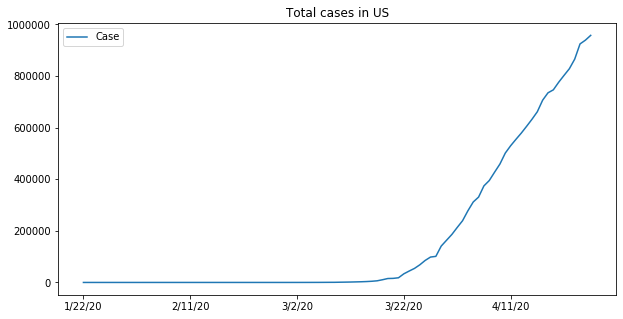

In [6]:
df_total_case.plot(figsize=(10,5),
                  kind='line',
                  title='Total cases in US')

In [7]:
zero_cases = df_case['4/26/20'] == 0
df_case[zero_cases]

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,Marshall Islands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Micronesia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,Palau,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


what about other another top cases country? Is the pattern is same?

In [17]:
df_case_top = df_case.sort_values(['4/26/20'], ascending=False)
df_case_top.set_index('Province/State', inplace=True)
df_case_top3 = df_case_top.iloc[:3]
df_case_top3

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Province/State,,,,,,,,,,,,,,,,,,,,,
New York,0,0,0,0,0,0,0,0,0,0,...,235395,242570,238138,245580,250800,253219,263744,282143,282143,282991
New Jersey,0,0,0,0,0,0,0,0,0,0,...,78467,81599,85301,88806,92387,95865,99989,105498,105523,109038
Massachusetts,0,0,0,0,0,0,0,0,0,0,...,34402,36372,38077,39643,41199,42944,46023,50969,53348,54938


For the analysis, we will take top three

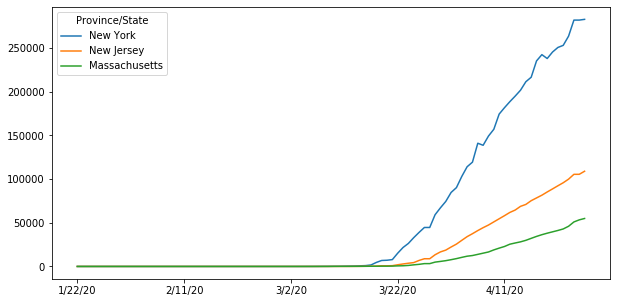

In [25]:
df_case_top3.T.plot(figsize=(10,5),
                    kind='line',
                    x_compat=False)

is there any correlation latitude to total cases?

In [29]:
def abs_from_equator(lat):
    return abs(lat)

df['abs_from_equator'] = df.Lat.apply(abs_from_equator)
df.head()

,Province/State,State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,abs_from_equator
0,Alabama,AL,US,32.3182,-86.9023,0,0,0,0,0,...,4723,4946,5424,5668,5831,6071,6026,6213,6627,32.3182
1,Alaska,AK,US,61.3707,-152.4044,0,0,0,0,0,...,314,319,321,329,335,337,339,339,341,61.3707
2,American Samoa,AS,US,-14.2710,-170.1322,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.2710
3,Arizona,AZ,US,33.7298,-111.4312,0,0,0,0,1,...,4724,4929,5064,5251,5459,5769,6312,6286,6526,33.7298
4,Arkansas,AR,US,34.9697,-92.3731,0,0,0,0,0,...,1777,1781,1964,2262,2281,2465,2829,2909,2941,34.9697


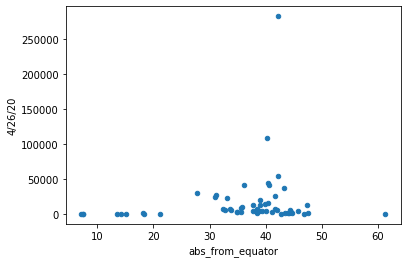

In [31]:
df.plot(kind='scatter',
       x='abs_from_equator',
       y='4/26/20')

In [32]:
df['abs_from_equator'].corr(df['4/26/20'])

0.14284654416787076